In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set(style="darkgrid")

from matplotlib.pyplot import figure

In [2]:
timestamp="20190320_125232"
models = ["FixedDose", "ClinicalDose", "LinUCBDisjointBasic", "LinUCBDisjoint",
          "DTree", "DTree-Alt", "Lasso", "Majority3"]

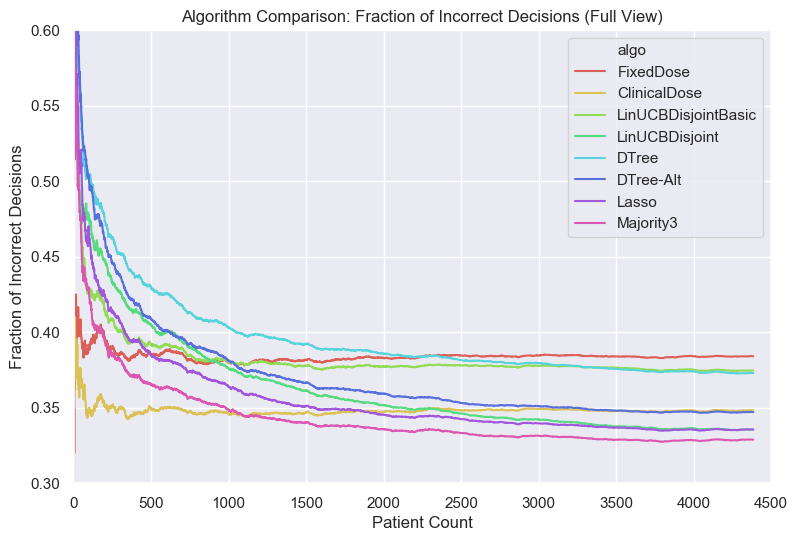

In [3]:
def read_mistake_file(model, result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_mistake_{model}.csv", header=None)
    df = df.transpose().expanding().mean()
    df = df.transpose().stack().to_frame().reset_index()
    df.columns = ["iter", "patient", "err"]
    df["algo"] = model
    return df

def get_culumative_mean_error_df(result_timestamp, models):
    plot_data = pd.DataFrame()
    for m in models:
        df = read_mistake_file(m, result_timestamp)
        plot_data = plot_data.append(df)
    return plot_data

def plot_err(filename, data, x_col, y_col, group_col, x_start, x_end, y_start, y_end, 
             plot_title, ci=None):
    figure(num=None, figsize=(9, 6), dpi=100, facecolor='w', edgecolor='k')
    ax = sns.lineplot(x=x_col, y=y_col, hue=group_col, data=data, ci=ci, 
                      markers=True, palette=sns.color_palette("hls",n_colors=8))
    plt.xlabel("Patient Count")
    plt.ylabel("Fraction of Incorrect Decisions")
    plt.axis([x_start, x_end, y_start, y_end])
    plt.legend(loc="upper right", title="")
    plt.title(plot_title)
    plt.show()
#     plt.savefig(filename)
#     plt.close()


def plot_full_model_errs(filename, result_timestamp, models, ci=None):
    plot_data = get_culumative_mean_error_df(result_timestamp, models)
    (x_start, x_end, y_start, y_end) = (0,4500,0.3,0.6)
    title = "Algorithm Comparison: Fraction of Incorrect Decisions (Full View)"
    plot_err(filename, plot_data, "patient", "err", "algo",
             x_start, x_end, y_start, y_end, title, ci)

# Plot 1: All model errs
imgfile = "err_all_models.png"
plot_full_model_errs(f"results/{timestamp}/{imgfile}", timestamp, models, ci=None)

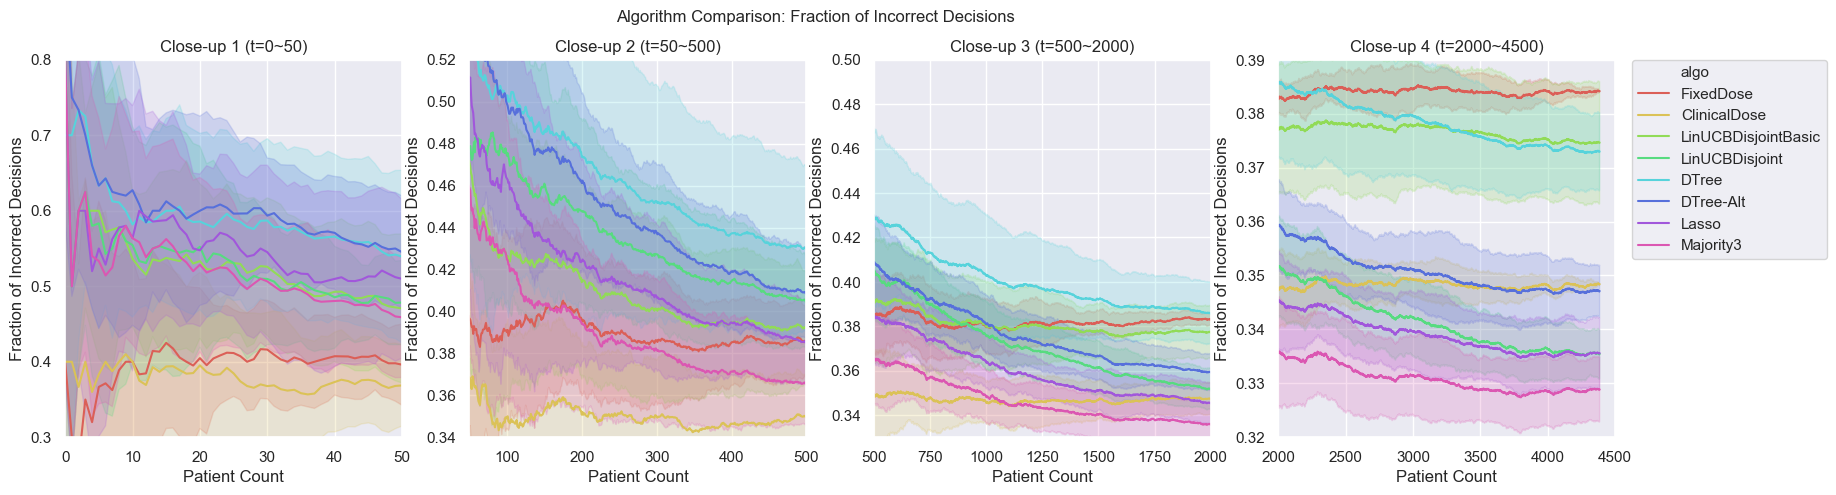

In [12]:
def plot_errs_closeup(data, x_col, y_col, group_col, x_start, x_end, y_start, y_end,
                      plot_title, ci=None):
    ax = sns.lineplot(x=x_col, y=y_col, hue=group_col, data=data, ci=ci, 
                      markers=True, palette=sns.color_palette("hls",n_colors=8))
    ax.get_legend().set_visible(False)
    plt.title(plot_title)
    plt.xlabel("Patient Count")
    plt.ylabel("Fraction of Incorrect Decisions")
    plt.axis([x_start, x_end, y_start, y_end])
    
def plot_model_errs_closeup(filename, result_timestamp, models, ci=None):    
    plot_data = get_culumative_mean_error_df(result_timestamp, models)    
    fig = figure(num=None, figsize=(20, 5), dpi=100, facecolor='w', edgecolor='k')
    bounds = [(0, 50, 0.3, 0.8), (50, 500, 0.34, 0.52), (500, 2000, 0.33, 0.5), (2000, 4500, 0.32, 0.39)]
    for i in range(len(bounds)):
        (x_start, x_end, y_start, y_end) = bounds[i]
        title = f"Close-up {i+1} (t={x_start}~{x_end})"
        ax = fig.add_subplot(1, 4, i+1)
        plot_errs_closeup(plot_data, "patient", "err", "algo", x_start, x_end, y_start, y_end, title, ci)

    # Put the legend out of the figure
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.suptitle("Algorithm Comparison: Fraction of Incorrect Decisions")
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    plt.show()
#     plt.savefig(filename)
#     plt.close()

# Plot 4: All model errs closeup
imgfile = "err_all_models_closeup.png"
plot_model_errs_closeup(f"results/{timestamp}/{imgfile}", timestamp, models, ci="sd")

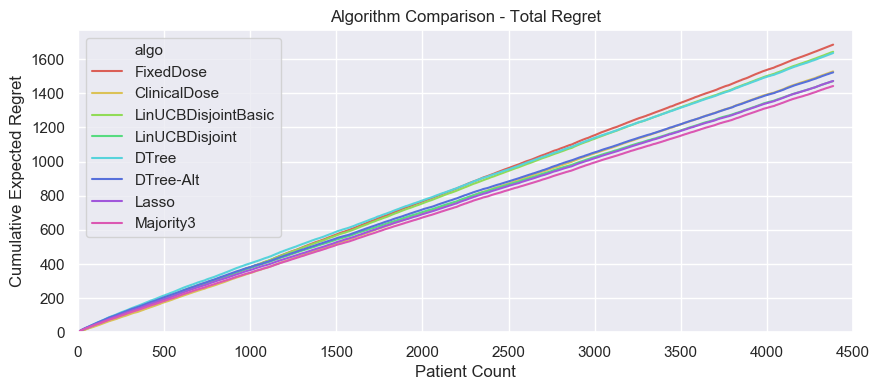

In [5]:
def read_regret_file(model, result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_regret_{model}.csv", header=None)
    df = df.mean().cumsum().to_frame().reset_index()
    df.columns = ["patient", "regret"]
    df["algo"] = model
    return df

def get_cumulative_regret_df(result_timestamp, models):
    plot_data = pd.DataFrame()
    for m in models:
        df = read_regret_file(m, result_timestamp)
        plot_data = plot_data.append(df)
    return plot_data
        
def plot_cumulative_regret(filename, data, x_col, y_col, group_col, x_start, x_end, y_start, y_end, plot_title):
    figure(num=None, figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k')
    ax = sns.lineplot(x=x_col, y=y_col, data=data, hue=group_col, ci=None, 
                      markers=True, palette=sns.color_palette("hls",n_colors=8))
    plt.xlabel("Patient Count")
    plt.ylabel("Cumulative Expected Regret")
    plt.axis([x_start, x_end, y_start, y_end])
    plt.legend(loc="upper left", title="")
    plt.title(plot_title)
    plt.show()
#     plt.savefig(filename)
#     plt.close()

def plot_model_regrets(filename, result_timestamp, models):
    plot_data = get_cumulative_regret_df(result_timestamp, models)
    (x_start, x_end, y_start, y_end) = (0,4500,0,None)
    plot_cumulative_regret(filename, plot_data, "patient", "regret", "algo",
                           x_start, x_end, y_start, y_end, "Algorithm Comparison - Total Regret")

# Plot 2: All model cumulative regrets
imgfile = "regret_all_models.png"
plot_model_regrets(f"results/{timestamp}/{imgfile}", timestamp, models)

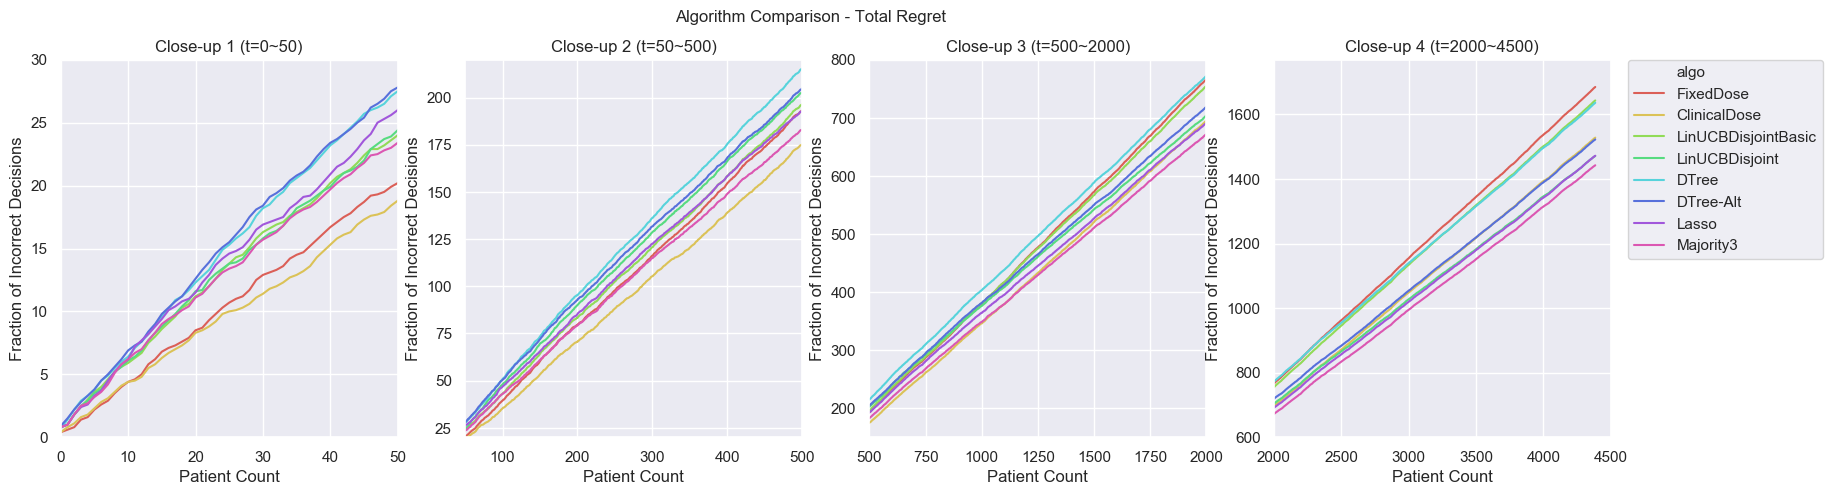

In [6]:
def plot_regrets_closeup(data, x_col, y_col, group_col, x_start, x_end, y_start, y_end, plot_title):
    ax = sns.lineplot(x=x_col, y=y_col, data=data, hue=group_col, ci=None, 
                      markers=True, palette=sns.color_palette("hls",n_colors=8))
    ax.get_legend().set_visible(False)
    plt.title(plot_title)
    plt.xlabel("Patient Count")
    plt.ylabel("Fraction of Incorrect Decisions")
    plt.axis([x_start, x_end, y_start, y_end])


def plot_model_regrets_closeup(filename, result_timestamp, models):    
    plot_data = get_cumulative_regret_df(result_timestamp, models)
    fig = figure(num=None, figsize=(20, 5), dpi=100, facecolor='w', edgecolor='k')
    bounds = [(0, 50, 0, 30), (50, 500, 20, 220), (500, 2000, 150, 800), (2000, 4500, 600, None)]
    for i in range(len(bounds)):
        (x_start, x_end, y_start, y_end) = bounds[i]
        title = f"Close-up {i+1} (t={x_start}~{x_end})"
        ax = fig.add_subplot(1, 4, i+1)
        plot_errs_closeup(plot_data, "patient", "regret", "algo",
                          x_start, x_end, y_start, y_end, title)

    # Put the legend out of the figure
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.suptitle("Algorithm Comparison - Total Regret")
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    plt.show()
#     plt.savefig(filename)
#     plt.close()

# Plot 5: All model regret closeup
imgfile = "regret_all_models_closeup.png"
plot_model_regrets_closeup(f"results/{timestamp}/{imgfile}", timestamp, models)

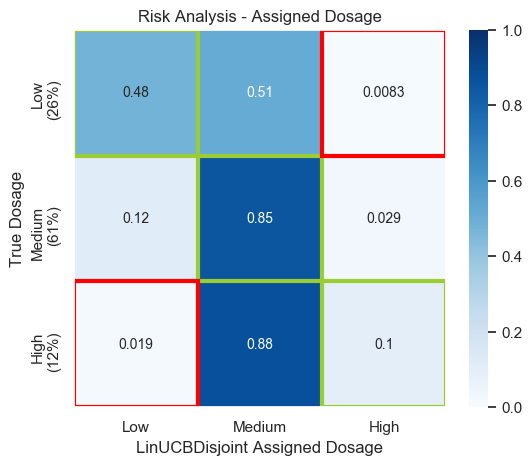

In [8]:
# This cell plots single confusion matrix; To plot multiple, use the next cell

def read_risk_file(model, result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_risk_{model}.csv", header=None)
    df = df.sum(axis=0).values.reshape((3, 3))
    df = pd.DataFrame(data=df, columns=["Low", "Medium", "High"], index=["True_Low", "True_Medium", "True_High"])
    total = df.sum(axis=1)
    total = total * 100 / total.sum()
    df = df.transpose().apply(lambda x: round(x / x.sum(), 4)).transpose()
    df["Total"] = total
    return df

def plot_confusion_matrix(filename, data, model, xticklabels, yticklabels, plot_title):
    figure(num=None, figsize=(6, 5), dpi=100, facecolor='w', edgecolor='k')
    ax = sns.heatmap(data, annot=True, vmin=0, vmax=1, cmap="Blues",
                     yticklabels=yticklabels, xticklabels=xticklabels)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='yellowgreen', lw=3))
    ax.add_patch(Rectangle((1, 1), 1, 1, fill=False, edgecolor='yellowgreen', lw=3))
    ax.add_patch(Rectangle((2, 2), 1, 1, fill=False, edgecolor='yellowgreen', lw=3)) 
    ax.add_patch(Rectangle((0, 2), 1, 1, fill=False, edgecolor='red', lw=3))
    ax.add_patch(Rectangle((2, 0), 1, 1, fill=False, edgecolor='red', lw=3))    
    plt.xlabel(f"{model} Assigned Dosage")
    plt.ylabel("True Dosage")
    plt.title("Risk Analysis - Assigned Dosage")
    plt.show()
#     plt.savefig(filename)
#     plt.close()

def plot_model_risks(result_timestamp, models):
    
    for m in models:
        filename = f"results/{result_timestamp}/risk_{m}.png"
        df = read_risk_file(m, result_timestamp)
        yticklabels=[f"Low\n({df.iloc[0][3].astype(int)}%)", f"Medium\n({df.iloc[1][3].astype(int)}%)",
                     f"High\n({df.iloc[2][3].astype(int)}%)"]
        xticklabels=["Low", "Medium", "High"]
        plot_confusion_matrix(filename, data=df.iloc[:,:3], model=m, xticklabels=xticklabels,
                              yticklabels=yticklabels, plot_title="Risk Analysis - Assigned Dosage")

plot_model_risks(timestamp, ["LinUCBDisjoint"])

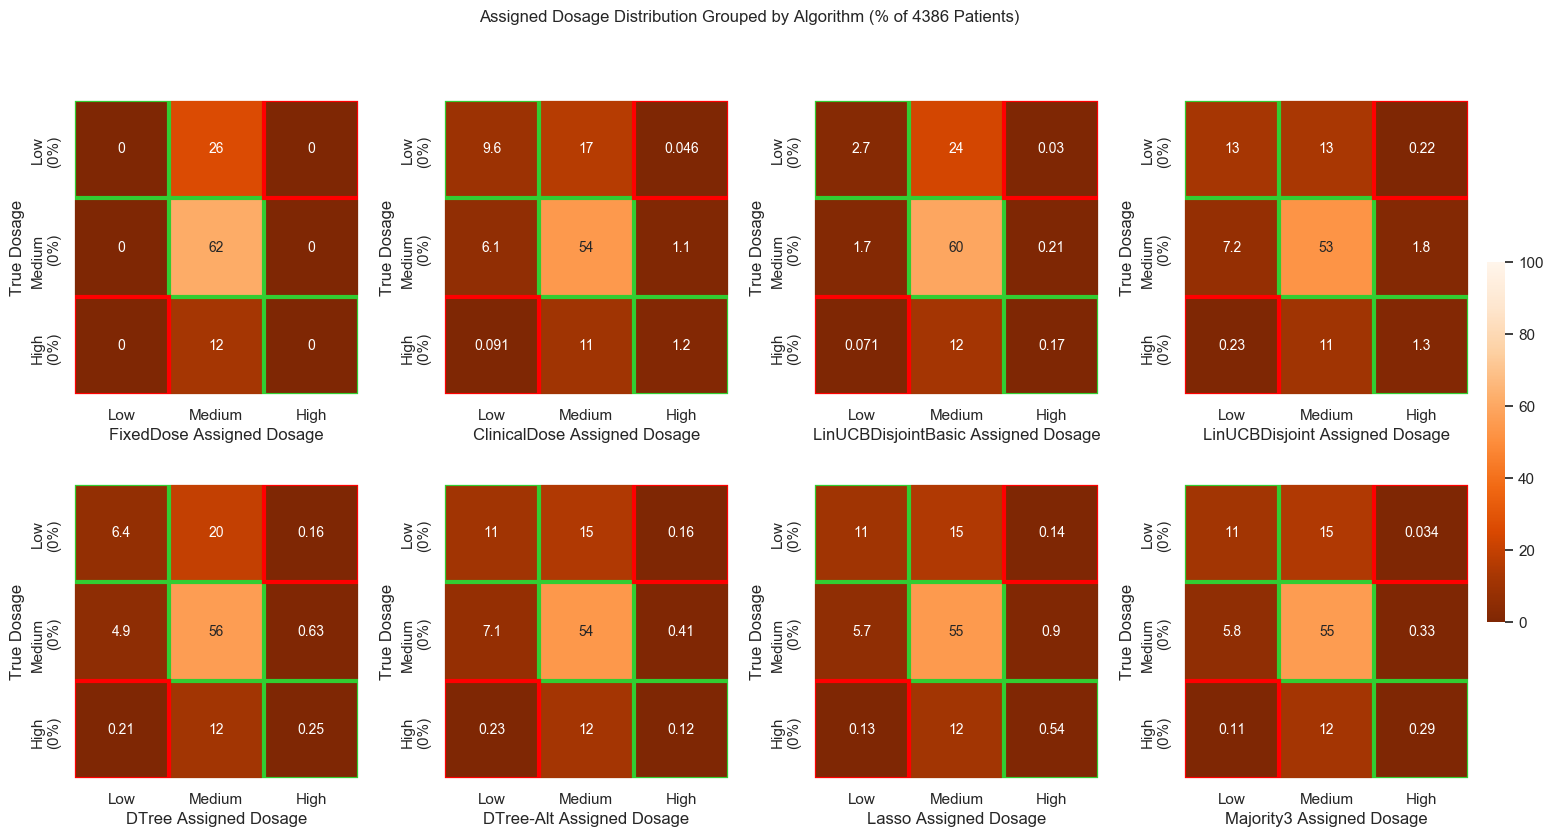

In [9]:
def read_risk_file(model, result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_risk_{model}.csv", header=None)
    df = df.sum(axis=0).values.reshape((3, 3))
    df = pd.DataFrame(data=df, columns=["Low", "Medium", "High"], index=["True_Low", "True_Medium", "True_High"])
    s = df.values.sum()
    total = df.sum(axis=1)
    total = total * 100 / total.sum()
#     df = df.transpose().apply(lambda x: round(x / x.sum(), 4)).transpose()
    df["Total"] = total
    return df / s

def plot_confusion_matrix(data, model, xticklabels, yticklabels, i, cbar_ax):
    ax = sns.heatmap(data, annot=True, vmin=0, vmax=100, cmap="Oranges_r", cbar=i == 0,
                     yticklabels=yticklabels, xticklabels=xticklabels, cbar_ax=None if i else cbar_ax)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    ax.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='limegreen', lw=3))
    ax.add_patch(Rectangle((1, 1), 1, 1, fill=False, edgecolor='limegreen', lw=3))
    ax.add_patch(Rectangle((2, 2), 1, 1, fill=False, edgecolor='limegreen', lw=3)) 
    ax.add_patch(Rectangle((0, 2), 1, 1, fill=False, edgecolor='red', lw=3))
    ax.add_patch(Rectangle((2, 0), 1, 1, fill=False, edgecolor='red', lw=3))    
    plt.xlabel(f"{model} Assigned Dosage")
    plt.ylabel("True Dosage")


def plot_model_risks(filename, result_timestamp, models):
    figure(num=None, figsize=(18, 9), dpi=100, facecolor='w', edgecolor='k')
    cbar_ax = plt.axes([.91, .3, .01, .4])
    for i in range(len(models)):
        df = read_risk_file(models[i], result_timestamp)
        yticklabels=[f"Low\n({df.iloc[0][3].astype(int)}%)", f"Medium\n({df.iloc[1][3].astype(int)}%)",
                     f"High\n({df.iloc[2][3].astype(int)}%)"]
        xticklabels=["Low", "Medium", "High"]
        plt.subplot(2, 4, i+1)
        plot_confusion_matrix(df.iloc[:,:3] * 100, models[i], xticklabels, yticklabels, i, cbar_ax)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    plt.suptitle(f"Assigned Dosage Distribution Grouped by Algorithm (% of 4386 Patients)")
    plt.show()
#     plt.savefig(filename)
#     plt.close()

imgfile = "risk_all_models.png"
plot_model_risks(f"results/{timestamp}/{imgfile}", timestamp, models)

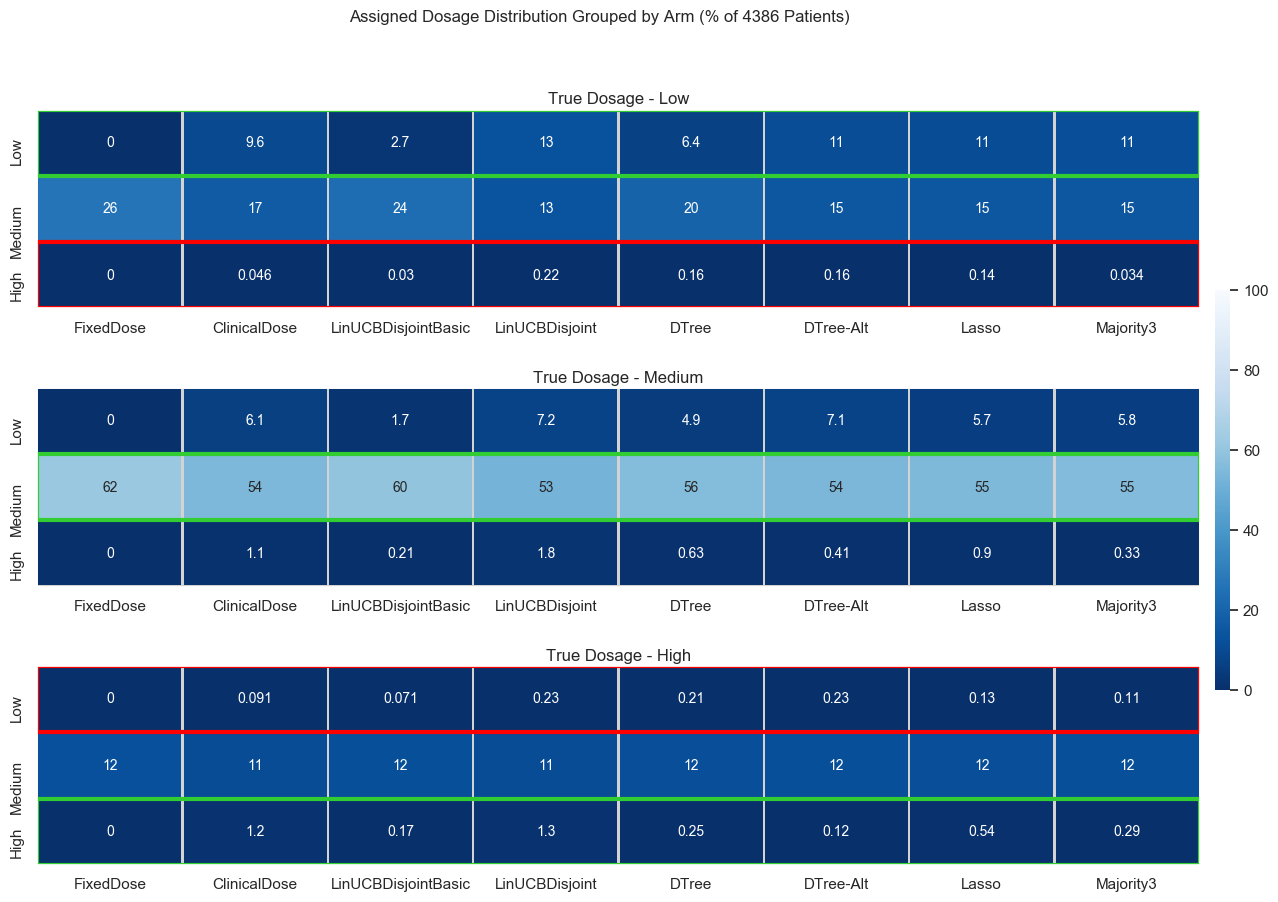

In [10]:
def read_risk_file2(model, result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_risk_{model}.csv", header=None)
    df = df.sum(axis=0).values.reshape((3, 3))
    df = pd.DataFrame(data=df, columns=["Low", "Medium", "High"], index=["True_Low", "True_Medium", "True_High"])
    return df

def aggregate_risks_by_true_dose(models, model_dfs):
    df_low = pd.DataFrame(columns=["Low", "Medium", "High"])
    df_med = pd.DataFrame(columns=["Low", "Medium", "High"])
    df_high = pd.DataFrame(columns=["Low", "Medium", "High"])
    for df in model_dfs:
        total = df.values.sum()
        df = df * 100 / total
        df_low = df_low.append(df.iloc[0])
        df_med = df_med.append(df.iloc[1])
        df_high = df_high.append(df.iloc[2])

    df_low = df_low.transpose()
    df_low.columns = models
    df_med = df_med.transpose()
    df_med.columns = models
    df_high = df_high.transpose()
    df_high.columns = models    
    return [df_low, df_med, df_high]


def plot_risk_by_dose_matrix(data, dose, xticklabels, yticklabels, i, cbar_ax):
    ax = sns.heatmap(data, annot=True, vmin=0, vmax=100, cmap="Blues_r", cbar=i == 0,
                     linewidths=1, linecolor='lightgray',
                     yticklabels=yticklabels, xticklabels=xticklabels, cbar_ax=None if i else cbar_ax)
    for _, spine in ax.spines.items():
        spine.set_visible(True)
    ax.xaxis.set_label_position('top')
    ax.add_patch(Rectangle((0, i), 8, 1, fill=False, edgecolor='limegreen', lw=3))
    
    if i == 0:
        ax.add_patch(Rectangle((0, 2), 8, 1, fill=False, edgecolor='red', lw=3))
    elif i == 2:
        ax.add_patch(Rectangle((0, 0), 8, 1, fill=False, edgecolor='red', lw=3))

    plt.xlabel(f"True Dosage - {dose[i]}")


def plot_risks_by_true_dose(filename, result_timestamp, models):
    model_dfs = [read_risk_file2(models[i], result_timestamp) for i in range(len(models))]
    dfs = aggregate_risks_by_true_dose(models, model_dfs)
    figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
    cbar_ax = plt.axes([.91, .3, .01, .4])
    for i in range(len(dfs)):
        yticklabels=["Low", "Medium", "High"]        
        plt.subplot(3, 1, i+1)
        plot_risk_by_dose_matrix(dfs[i], yticklabels, models, yticklabels, i, cbar_ax)
        
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
    plt.suptitle("Assigned Dosage Distribution Grouped by Arm (% of 4386 Patients)")
    plt.show()
#     plt.savefig(filename)
#     plt.close()
    

imgfile = "risk_by_true_dose.png"
plot_risks_by_true_dose(f"results/{timestamp}/{imgfile}", timestamp, models)

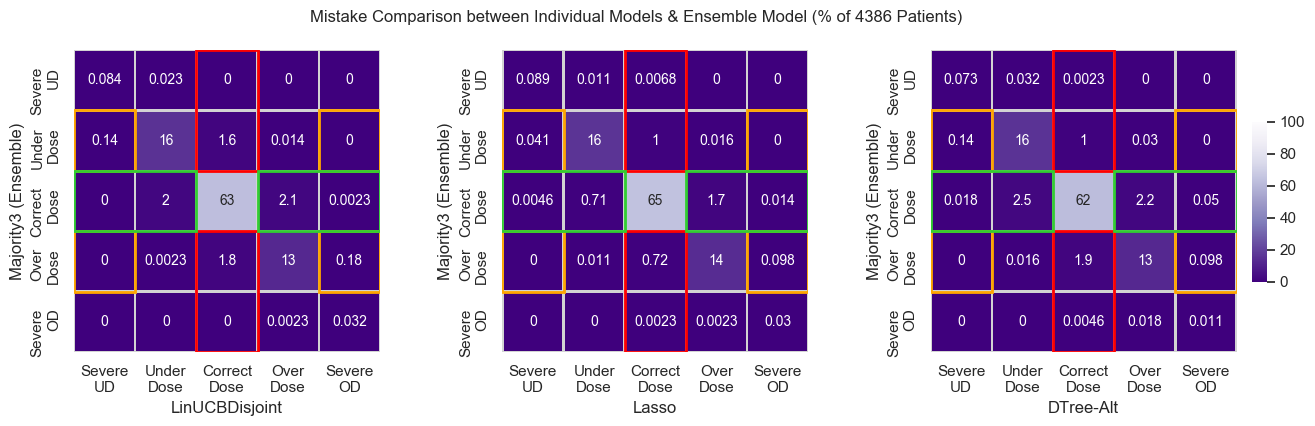

In [11]:
def read_truth_file(result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_truth.csv", header=None)
    return df

def read_action_file(model, result_timestamp):
    df = pd.read_csv(f"results/{result_timestamp}/training_action_{model}.csv", header=None)
    return df

def get_action_diffs(result_timestamp):
    truth = read_truth_file(result_timestamp)
    linucb = read_action_file("LinUCBDisjoint", result_timestamp) - truth
    lasso = read_action_file("Lasso", result_timestamp) - truth
    dtree = read_action_file("Dtree-Alt", result_timestamp) - truth
    majority = read_action_file("Majority3", result_timestamp) - truth 
    return truth, linucb, lasso, dtree, majority


def compare_model_with_majority(model_diff, majority_diff):
    # M: -2 -1 0 1 2 => m: -2 -1 0 1 2 
    diff_matrix = np.zeros((5, 5), dtype=int)
    # for each row i, column j
    for i in range(model_diff.shape[0]):
        for j in range(model_diff.shape[1]):
            ridx = majority_diff.iloc[i,j] + 2
            cidx = model_diff.iloc[i,j] + 2
            diff_matrix[ridx][cidx] += 1
    diff_matrix = diff_matrix * 100.0 / (model_diff.shape[0] * model_diff.shape[1]) # averaged across iterations
    return diff_matrix


def plot_mistake_matrix(data, model, xticklabels, yticklabels, i, cbar_ax):
    ax = sns.heatmap(data, annot=True, vmin=0, vmax=100, cmap="Purples_r", cbar=i == 0, 
                     linewidths=1, linecolor='lightgray',
                     yticklabels=yticklabels, xticklabels=xticklabels, cbar_ax=None if i else cbar_ax)

    ax.add_patch(Rectangle((0, 1), 1, 1, fill=False, edgecolor='orange', lw=2))
    ax.add_patch(Rectangle((0, 3), 1, 1, fill=False, edgecolor='orange', lw=2))
    ax.add_patch(Rectangle((4, 1), 1, 1, fill=False, edgecolor='orange', lw=2))
    ax.add_patch(Rectangle((4, 3), 1, 1, fill=False, edgecolor='orange', lw=2))
    ax.add_patch(Rectangle((2, 0), 1, 2, fill=False, edgecolor='red', lw=2))
    ax.add_patch(Rectangle((2, 3), 1, 2, fill=False, edgecolor='red', lw=2))
    ax.add_patch(Rectangle((0, 2), 2, 1, fill=False, edgecolor='limegreen', lw=2))
    ax.add_patch(Rectangle((3, 2), 2, 1, fill=False, edgecolor='limegreen', lw=2)) 
    
    plt.xlabel(f"{model}")
    plt.ylabel("Majority3 (Ensemble)")


def plot_ensemble_mistakes(filename, result_timestamp):
    truth, linucb, lasso, dtree, majority = get_action_diffs(timestamp)
    models = [linucb, lasso, dtree]
    model_names = ["LinUCBDisjoint", "Lasso", "DTree-Alt"]
    
    figure(num=None, figsize=(15, 4), dpi=100, facecolor='w', edgecolor='k')
    cbar_ax = plt.axes([.91, .3, .01, .4])
    yticklabels=["Severe\nUD", "Under\nDose", "Correct\nDose", "Over\nDose", "Severe\nOD"]
    xticklabels=["Severe\nUD", "Under\nDose", "Correct\nDose", "Over\nDose", "Severe\nOD"]
    
    for i in range(len(models)):        
        plt.subplot(1, 3, i + 1)
        diff_matrix = compare_model_with_majority(models[i], majority)
        plot_mistake_matrix(diff_matrix, model_names[i], xticklabels, yticklabels, i, cbar_ax)
        
    plt.subplots_adjust(wspace = 0.4, hspace = 0.5)
    plt.suptitle(f"Mistake Comparison between Individual Models & Ensemble Model (% of {majority.shape[1]} Patients)")
    plt.show()
#     plt.savefig(filename)
#     plt.close()

imgfile = "mistakes_ensemble.png"
plot_ensemble_mistakes(imgfile, timestamp)